이번 장의 주제는 신경망 학습이다. 여기서 **학습**이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 의미한다. <br>
이번 장에서는 신경망이 학습할 수 있도록 해주는 지표인 **손실 함수**를 소개한다. <br>
이 손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표다. <br>
이번 장에서는 손실 함수의 값을 가급적 작게 만드는 기법으로 함수의 기울기를 활용하는 경사법을 소개한다.

## <strong> 3.1 데이터에서 학습한다! </strong>

**신경망의 특징은 데이터를 보고 학습할 수 있다는 점이다.** <br>
데이터에서 학습한다는 것은 **가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻이다.** <br>


<h3> <strong> 1. 데이터 주도 학습 </strong> </h3>

**기계학습은 데이터가 생명이다.** 데이터에서 답을 찾고 데이터에서 패턴을 발견하고 데이터로 이야기를 만드는 것이 기계 학습이다. <br>
데이터가 없으면 아무것도 시작되지 않는다. 그래서 기계학습의 중심에는 데이터가 존재한다. <br>
이처럼 데이터가 이끄는 접근 방식 덕에 사람 중심 접근에서 벗어날 수 있다.

문제 하나를 생각해보자. 이미지에서 '5'라는 숫자를 인식하는 프로그램을 구현해야 한다고 가정하자. <br>

사실 '5'를 제대로 분류하는 프로그램을 직접 고안해 설계하는 것은 어려운 문제다. <br>
사람이라면 어렵지 않지만 그 안에 숨은 규칙성을 명확한 로직으로 풀기가 만만치 않다. <br>
즉, '5'를 인식하는 알고리즘을 밑바닥부터 '설계하는' 것 보다 **주어진 데이터를 잘 활용해서 해결하는 것이 더 편할 것 같다.** <br>
그런 방법 중 하나가 이미지에서 **특징(feature)**을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법이다. <br>
여기서 말하는 특징은 **입력 데이터에서 본질적인 데이터를 정확하게 추출할 수 있도록 설계된 변환기를 가리킨다.** <br>
이미지의 특징은 보통 벡터로 기술하고, 컴퓨터 비전 분야에서는 SIFT, SURF, HOG 등의 특징을 많이 사용한다. <br>
이런 특징을 사용하여 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN 등으로 학습할 수 있다.

이와 같은 기계학습에서는 모아진 데이터로부터 규칙을 찾아내는 역할을 '기계'가 담당한다. <br>
단, 이미지를 벡터로 변환할 때 사용하는 특징은 여전히 사람이 설계하는 것임을 주의해야 한다. <br>
즉, 문제에 적합한 특징을 쓰지 않으면 좋은 결과를 얻을 수 없다. 

지금까지 기계학습의 두 접근법을 이야기했다. 두 방식 모두 그림으로 나타내면 아래와 같다. <br>
하지만 **신경망(딥러닝) 방식은 아래처럼 사람이 개입하지 않는 블록 하나로 그려진다.**

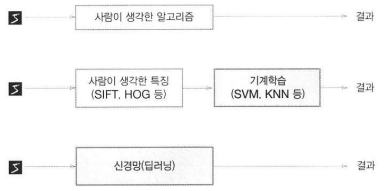

위와 같이 신경망은 이미지를 있는 그대로 학습한다. <br> 
**두 번째 접근 방식에서는 특징을 사람이 설계했지만, 신경망은 이미지에 포함된 중요한 특징까지 기계가 스스로 학습한다.**

신경망의 이점은 모든 문제를 같은 맥락에서 풀 수 있다는 점에 있다. <br>
예를 들어, '5'를 인식하는 문제든, '개'를 인식하는 문제든 세부사항과 관계없이 주어진 데이터를 온전히 학습하고, 
<br> 주어진 문제의 패턴을 발견하려는 시도를 한다.

<h3> <strong> 2. 훈련 데이터와 시험 데이터 </strong> </h3>

기계학습은 모델의 범용 능력을 평가하기 위해 데이터를 **훈련 데이터(training data)와 시험 데이터(test data)**로 나눠 학습과 실험을 수행한다. <br>
우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾는다. <br>
그리고 시험 데이터를 사용해 앞서 훈련한 모델의 실력을 평가한다. <br>

범용 능력이란 아직 보지 못한 데이터로도 문제를 올바르게 풀어내는 능력이다. <br>
이 범용 능력을 획득하는 것이 기계학습의 최종 목표다.

## <strong> 3.2 손실 함수 </strong>

신경망 학습은 현재의 상태를 '하나의 지표'로 표현한다. <br>
그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색한다. <br>
이때 신경망 학습에서 사용하는 지표를 **손실 함수(loss function)**라고 한다. <br>
이 손실 함수는 임의의 함수를 사용할 수도 있지만 일반적으로 **오차제곱합**과 **교차 엔트로피 오차**를 사용한다.

<h3> <strong> 1, 오차제곱합 </strong> </h3>

가장 많이 쓰이는 손실 함수는 **'오차제곱합(sum of squares for error, SSE)'**이다. 수식으로는 다음과 같다.

$E = \frac{1}{2}\sum_k{(y_k-t_k)}^2$

$y_k$는 신경망의 출력, $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타낸다. <br>
예를 들어, 숫자 인식 문제에서 $y_k$와 $t_k$는 다음과 같다.

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

이 배열들의 원소는 첫 번째 인덱스부터 순서대로 숫자 '0', '1', '2', ... 일 때의 값이다. <br>
여기에서 신경망의 **출력 y는 소프트맥스 함수의 출력이다.** <br>
**정답 레이블 t는 정답을 가리키는 위치의 원소는 1로, 그 외는 0으로 표기한다.** <br>
이처럼 한 원소만 1로 하고 그 외는 0으로 나타내는 표기법을 **원-핫 인코딩**이라고 한다. <br>
아래 코드는 오차제곱합을 구해는 함수이다.

In [ ]:
import numpy as np

def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

해당 함수를 사용해보자.

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


<h3> <strong> 2. 교차 엔트로피 오차 </strong> </h3>

또 다른 손실 함수로서 **'교차 엔트로피 오차(cross entropy error, CEE)'**도 자주 이용한다. <br>
교차 엔트로피 오차의 수식은 다음과 같다.

$E=-\sum_k{t_k \log y_k}$

여기서 $\log$는 밑이 $e$인 자연로그이다. $y_k$는 신경망의 출력, $t_k$는 정답 레이블이다. <br>
또 $t_k$는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0이다. <br>
그래서 실질적으로 정답일 때의 추정($t_k$가 1일 때의 $y_k$의 자연로그를 계산하는 식이 된다.) <br>
아래는 정의역이 0이상 1이하일 때의 자연로그 그래프이다.

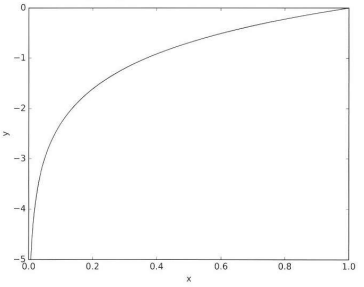

x가 1일 때 y는 0이 되고, x가 0에 가까워질수록 y값은 작아진다. <br>
즉, 정답에 해당하는 출력이 커질수록 0에 가깝고, 정답일 때의 출력이 작아질수록 오차는 커진다. <br>
아래는 교차 엔트로피 오차를 구현한 코드이다.

In [ ]:
import numpy as np

def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t*np.log(y+delta))

위 코드를 보면 np.log를 계산할 때 아주 작은 값인 delta를 더해주었다. <br>
이는 np.log() 함수에 0을 입력하면 -inf가 되어 더 이상 계산을 진행할 수 없기 때문이다. <br>
즉 아주 작은 값을 더해 마이너스 무한대가 발생하지 않도록 한 것이다. <br>
아래는 cross_entropy_error 함수를 사용한 예시이다.

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


<h3> <strong> 3. 미니배치 학습 </strong> </h3>

기계학습 문제는 훈련 데이터를 사용해 학습한다. <br>
구체적으로 말하면 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아낸다. <br>
이렇게 하려면 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 한다. <br>
즉, 훈련 데이터가 100개 있으면 그로부터 계산한 100개의 손실 함수 값들의 합을 지표로 삼아야 한다. <br>

지금까지는 데이터 하나에 대한 손실 함수만 생각해봤다. 
**지금부터는 훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법을 생각해보자.** <br>
교차 엔트로피 오차는 다음과 같은 수식을 가진다.

$E=-\frac{1}{N}\sum_n\sum_k t_nk \log y_{nk}$

이때 데이터가 $N$개 라면 $t_nk$는 $n$번째 데이터의 $k$번째 값을 의미한다. <br>
모든 데이터의 손실 함수 값을 더해 $N$을 나눔으로써 '평균 손실 함수'를 구한다. <br>
이렇게 평균을 구해서 사용하면 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 얻을 수 있다.

하지만 모든 데이터를 대상으로 손실 함수의 합을 구하려면 오랜 시간이 걸린다. <br>
따라서 데이터 일부를 추려 전체의 '근사치'로 이용할 수 있다. <br>
신경망 학습에서도 훈련 데이터로부터 일부만 골라 학습을 수행하는데 이 일부를 **미니배치(mini-batch)**라고 부른다.

아래는 미니배치 학습을 위해 훈련 데이터에서 지정한 수의 데이터를 무작위로 골라내는 코드이다.

In [2]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [3]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice() 함수는 지정한 범위 수 중에서 무작위로 원하는 개수만 꺼낼 수 있다. <br>
위의 경우 0 이상 60000 미만의 수 중에서 무작위로 10개를 골라낸다. <br>
아래는 임의로 해당 함수를 사용해본 코드이다.

In [ ]:
np.random.choice(60000, 10)

array([54241,  8836, 58213, 49213, 13661, 56667, 23921, 32994, 19984,
        6135])

<h3> <strong> 4. 배치용 교차 엔트로피 오차 </strong> </h3>

미니배치 같은 배치 데이터를 지원하는 교차 엔트로피 오차를 구현해보자.

In [ ]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  
  batch_size = y.shape[0]
  return -np.sum(t*np.log(y+1e-7)) / batch_size

정답 레이블이 원-핫 인코딩이 아니라면 아래처럼 구현할 수 있다. 

In [ ]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
     t = t.reshape(1, t.size)
     y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t]+1e-7)) / batch_size

<h3> <strong> 5. 손실 함수 설정 이유 </strong> </h3>

신경망 학습에서는 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 작게 하는 매개변수 값을 찾는다. <br> 
이때 매개변수의 미분을 계산하고, 매개변수 값을 서서히 갱신하는 과정을 반복한다. <br>

하나의 신경망이 있고 가중치를 구하려고 한다고 가정하자. <br>
이때 가중치 매개변수의 손실 함수의 미분이란 '가중치 매개변수의 값을 아주 조금 변화 시켰을 때, 손실 함수가 어떻게 변하나'를 의미한다. <br>
이때 가중치 매개변수를 미분 값의 반대 방향으로 변화시키면 손실 함수의 값을 줄일 수 있다. <br>
단, 미분 값이 0이면 가중치 매개변수를어느 쪽으로 움직여도 손실 함수의 값은 변하지 않는다. 즉 갱신이 멈춘다.

따라서 정확도, 계단 함수와 같이 매개변수의 미분이 대부분 0이 되는 함수들은 손실 함수로 사용하지 않는 것이 좋다.


## <strong> 3.3 수치 미분 </strong>

<h3> <strong> 1. 미분 </strong> </h3>

미분은 '특정 순간'의 변화량을 의미하며 수식으로는 다음과 같다.

$\frac{df(x)}{dz} = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$ 

위 식이 의미하는 것은 X의 작은 변화가 f(x)를 얼마나 변화시키냐는 것이다. <br>
아래는 위식을 이용해 미분 계산을 구현한 것이다.

In [4]:
# 나쁜 구현
def numerical_diff(f, x):
  h = 1e-50
  return (f(x+h)-f(x)) / h

위 코드에서는 h에 가능한 작은 값을 대입하기 위해 1e-50을 이용했다. <br>
이 방식은 **반올림 오차(rounding error)**를 일으킨다. <br>
반올림 오차는 작은 값이 생략되어 최종 계산 결과에 오차가 생기게 한다. <br>
아래는 파이썬에서의 반올림 오차 예시이다.

In [5]:
import numpy as np
np.float32(1e-50)

0.0

사실 우리의 목표는 x 위치의 함수 기울기를 구하는 것이다. <br>
하지만 위 코드에서 구현한 것은 (x+h)와 x 사이의 기울기이다. <br>
따라서 우리가 계산한 값에는 오차가 생기는데 이 오차를 줄이기 위해 (x+h)와 (x-h) 사이의 기울기를 이용하기도 한다. <br>
이러한 방법은 **'중심 차분'** 혹은 **'중앙 차분'**이라고 한다.

아래 코드는 위 문제점을 모두 보완한 코드이다.

In [6]:
def numerical_diff(f, x):
  h = 1e-4
  return ((f(x+h)-f(x-h)) / (2*h))

[참고] 위처럼 아주 작은 차분으로 미분하는 것을 **수치 미분**이라고 한다. <br>
단, 수식을 전개해 미분하는 것은 '해석적 해' 혹은 '해석적으로 미분하다' 등으로 표현한다.

<h3> <strong> 2. 수치 미분의 예 </strong> </h3>

아래 간단한 함수를 미분해보자.

$y = 0.01x^2+0.1x$

In [7]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

위 함수를 그려보자.

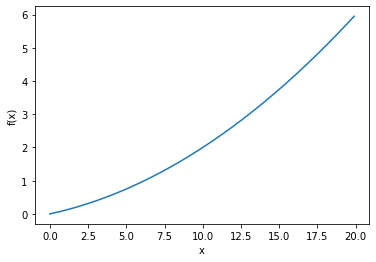

In [8]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

이제 x가 5, 10일 때의 미분값을 계산해보자.

In [9]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


<h3> <strong> 3. 편미분 </strong> </h3>

이번에는 아래 식을 미분해보자.

$f(x_0, x_1)=x_0^2+x_1^2$

In [10]:
def function_2(x):
  return x[0]**2 + x[1]**2

위 함수를 미분할 때 주의할 점은 변수가 2개라는 점이다. <br>
따라서 어느 변수에 대한 미분이냐에 다라 구별해야 한다. <br>
이와 같이 변수가 여럿인 함수에 대한 미분을 **편미분**이라고 한다. <br>
편미분은 식으로 $\frac{\partial f}{\partial x_0}$나 $\frac{\partial f}{\partial x_1}$처럼 표현한다.


In [11]:
# x_0=3, x_1=4 일때 x_0에 대한 편미분
def function_tmp1(x0):
  return x0*x0+4.0**2.0

print(numerical_diff(function_tmp1, 3.0))

6.00000000000378


In [12]:
# x_0=3, x_1=4 일때 x_1에 대한 편미분
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

7.999999999999119


## <strong> 3.4 기울기 </strong>

임의의 함수의 두 변수 $x_0$과 $x_1$의 편미분을 묶어 $(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1})$를 계산한다고 가정하자. <br>
이때 $(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1})$처럼 모든 변수의 편미분을 벡터로 정리한 것을 **기울기(gradient)**라고 한다.

아래와 같이 구현할 수 있다.

In [ ]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) # x와 형상이 같은 배열 생성

  for idx in range(x.size):
    tmp_val = x[idx]

    # f(x+h)
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h)
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

위 함수를 이용해 기울기를 구해보자.

In [ ]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


기울기의 결과에 마이너스를 붙인 벡터를 그림으로 그려보면 다음과 같다.

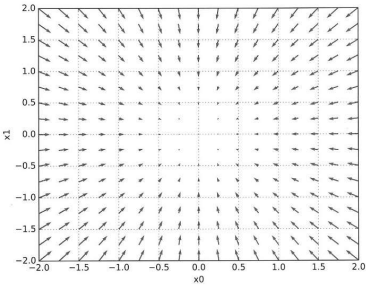

위 그림을 봐면 기울기는 함수의 가장 낮은 장소(최솟값)을 가리킨다. <br>
또한 최솟값에서 멀어질수록 화살표의 크기가 커진다. <br>
위 그림에서 기울기는 가장 낮은 장소를 가리키지만 실제로 반드시 그렇다고는 할 수 없다. <br>
**기울기가 가리키는 방향은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.**

<h3> <strong> 1. 경사 하강법 </strong> </h3>

신경망은 손실 함수가 최솟값이 될 때의 매개변수를 학습 시에 찾아야 한다. <br>
하지만 일반적인 문제의 손실 함수는 매우 복잡하며 매개변수 공간이 방대하여 어디가 최솟값인지 짐작할 수 없다. <br>
이런 상황에서 **기울기를 이용해 함수의 최솟값을 찾으려는 것이 경사법이다.** <br>
하지만 기울기가 가리키는 곳이 정말 함수의 최솟값이 있는지 보장할 수는 없다. <br>
기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있다. <br>
따라서 최솟값이 되는 장소를 찾는 문제에서는 기울기 정보를 단서로 나아갈 방향을 정한다.

경사하강법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. <br>
그리고 이동한 곳에서도 기울기르 구하고 기울어진 방향으로 나아간다. <br>
이런 방식으로 함수값을 줄이는 것이 **경사법(gradient method)**이다.

경사법을 수식으로 나타내면 다음과 같다.

$
x_0 = x_0 - \eta\frac{\partial f}{\partial x_0} \\
x_1 = x_1 - \eta\frac{\partial f}{\partial x_1}
$

위 식을 여러 번 반복하면서 값을 갱신하는 방법이 경사법이다. <br>
$\eta$는 학습률(learning rate)를 의미한다. 한 번의 학습으로 매개변수 값을 얼마나 갱신하는 지를 결정한다. <br>
해당 값이 너무 크거나 작으면 좋은 장소를 찾아갈 수 없으며 보통 이 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행한다.

경사하강법은 아래와 같이 구현할 수 있다.

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
  return x

위 함수를 이용해 $f(x_0, x_1)=x_0^2+x_1^2$의 극솟값을 구해보자.

In [ ]:
def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

(0, 0)에 가까운 결과가 출력되었다.

이번에는 학습률이 큰 경우와 작은 경우를 확인해보자.

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

위처럼 학습률이 너무 크면 큰 값로 발산하고 너무 작으면 값이 갱신되지 않고 끝이난다.

<h3> <strong> 2. 신경망에서의 기울기 </strong> </h3>

신경망 학습에서는 가중치 매개변수에 대한 손실 함수의 기울기를 구해야 한다. <br>
예를 들어 형상이 $2\times 3$, 가중치가 W, 손실 함수가 L인 신경망의 경사는 다음과 같다.

$
W \, = \, \begin{pmatrix}
w_{11} w_{12} w_{13} \\
w_{21} w_{21} w_{21}
\end{pmatrix}
$

$
\frac{\partial L}{\partial W} \, = \,
\begin{pmatrix}
\frac{\partial L}{\partial W_{11}} \frac{\partial L}{\partial W_{12}} \frac{\partial L}{\partial W_{13}} \\
\frac{\partial L}{\partial W_{21}} \frac{\partial L}{\partial W_{22}} \frac{\partial L}{\partial W_{23}}
\end{pmatrix}
$

**이때 $W$와 $\frac{\partial L}{\partial W}$의 형상은 동일하다.** <br>
아래는 가단한 신경망을 이용해 기울기를 구하는 코드이다.

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3)
  
  def predict(self, x):
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss   

이어서 기울기를 구해보자.

In [ ]:
net = simpleNet()
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

def f(W):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.22985121  0.10976194 -0.33961315]
 [ 0.34477681  0.16464291 -0.50941972]]


즉, $W_{11}$을 h만큼 늘리면 손실 함수의 값은 0.2h 만큼 증가하고, $W_{23}$을 h만큼 늘리면 손실 함수의 값은 -0.5h 만큼 감소하게 된다.

## <strong> 3.5 학습 알고리즘 구현  </strong>

신경망 학습의 순서는 다음과 같다.

* 전제<br>
신경망은 학습 시켜야할 가중치와 편향을 가지고 있으며 해당 값들이 훈련 데이터에 적응하도록 조정한다.

* 1단계 - 미니배치<br>
훈련 데이터 중 일부를 무작위로 가져오며 이렇게 선별한 데이터를 미니배치라고 한다.

* 2단계 - 기울기 산출<br>
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.

* 3단계 - 매개변수 갱신<br>
가중치 매개변수를 기울기 방향으로 갱신한다.

* 4단계 - 반복<br>
1~3단계를 반복한다.

위 과정이 경사 하강법으로 매개변수를 갱신하는 신경망 학습이 이뤄지는 순서다. <br>
이때 데이터를 미니배치로 무작위로 선정하므로 **'확률적 경사 하강법(stochastic gradient descent)'**라고 부른다.<br>
